# Machine Learning For Business

>The goal of this project to find the region with the highest profit margin for new well development.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Download and Prepare Data

### General Information

In [2]:
r1 = pd.read_csv('/datasets/geo_data_0.csv')
r1.info()
r1.head()
r1[r1.duplicated()]
print("")

r2 = pd.read_csv('/datasets/geo_data_1.csv')
r2.info()
r2.head()
r2[r2.duplicated()]

print("")
r3 = pd.read_csv('/datasets/geo_data_2.csv')
r3.info()
r3.head()
r3[r3.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3

,id,f0,f1,f2,product


### Identify the features/target

In [3]:
r1_features = r1.drop(['product', 'id'], axis=1)
r1_target = r1['product']

r2_features = r2.drop(['product', 'id'], axis=1)
r2_target = r2['product']

r3_features = r3.drop(['product', 'id'], axis=1)
r3_target = r3['product']

### General Information Conclusion

>When approaching a dataset that I am not familiar with, the first thing I do is look at the information about the dataset. I print out the information revealing the columns and datatypes for those columns. I check to see if any column has the wrong data type and needs to be fixed in the data processing stage. After, I want to see the dataframe and printed out the head of each region.

## Train and test the model for each region

### Split the data into a training set and validation set at a ratio of 75:25.

In [4]:
# region 1
r1_features_train, r1_features_valid, r1_target_train, r1_target_valid  = train_test_split(r1_features, r1_target, test_size=0.25, random_state=12345) 

# region 2
r2_features_train, r2_features_valid, r2_target_train, r2_target_valid  = train_test_split(r2_features, r2_target, test_size=0.25, random_state=12345) 

# region 3
r3_features_train, r3_features_valid, r3_target_train, r3_target_valid  = train_test_split(r3_features, r3_target, test_size=0.25, random_state=12345) 


### Train the model and make predictions for the validation set.

In [5]:
# region 1
model = LinearRegression()
model.fit(r1_features_train, r1_target_train)
r1_predicted_valid = model.predict(r1_features_valid)

# region 2
model = LinearRegression()
model.fit(r2_features_train, r2_target_train)
r2_predicted_valid = model.predict(r2_features_valid)

# region 3
model = LinearRegression()
model.fit(r3_features_train, r3_target_train)
r3_predicted_valid = model.predict(r3_features_valid)

In [6]:
region1 = pd.DataFrame(data=r1_target_valid)
region1.columns = ['actual']
region1['predicted'] = r1_predicted_valid

region2 = pd.DataFrame(data=r2_target_valid)
region2.columns = ['actual']
region2['predicted'] = r2_predicted_valid

region3 = pd.DataFrame(data=r3_target_valid)
region3.columns = ['actual']
region3['predicted'] = r3_predicted_valid

### Print the average volume of predicted reserves and model RMSE.

In [7]:

# region 1
print("Region 1 avg volume of predicted reserves:", region1['predicted'].mean())
print("Region 2 avg volume of predicted reserves:", region2['predicted'].mean())
print("Region 3 avg volume of predicted reserves:", region3['predicted'].mean())


Region 1 avg volume of predicted reserves: 92.59256778438038
Region 2 avg volume of predicted reserves: 68.728546895446
Region 3 avg volume of predicted reserves: 94.96504596800489


In [8]:
# calculating the RMSE
print("Region 1 RMSE:", mean_squared_error(region1['actual'], region1['predicted']) ** 0.5)
print("Region 2 RMSE:", mean_squared_error(region2['actual'], region2['predicted']) ** 0.5)
print("Region 3 RMSE:", mean_squared_error(region3['actual'], region3['predicted']) ** 0.5)

Region 1 RMSE: 37.5794217150813
Region 2 RMSE: 0.893099286775616
Region 3 RMSE: 40.02970873393434


###  Analyze the results

>In this section I split the data into training and validation sets with a 75/25 split. I then trained the model and made predictions using the validation set (for each region). After, I created dataframes containing actual data and the predictions made for each region. To conclude, I calculated the avg volume of predicted reserves for each region and found the RMSE score. Region 2 has a low score for 0.89, meaning the model's predictions and the actual values were similar.

## Profit Calculation

### Store all key values for calculations in separate variables.

In [9]:
well_budget = 500000 #100 million / 200 = 500000 USD
volume_profit = 4500 # given

#volume needed for developing a new well without losses
volume = well_budget / volume_profit
print("Volume of reserves sufficient for developing a new well without losses:", volume, "thousand barrels")

Volume of reserves sufficient for developing a new well without losses: 111.11111111111111 thousand barrels


### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [10]:
# Compare the obtained value with the average volume of reserves in each region.
print("Avg volume in Region 1:", region1['actual'].mean())
print("Avg volume in Region 2:", region2['actual'].mean())
print("Avg volume in Region 3:", region3['actual'].mean())

Avg volume in Region 1: 92.07859674082927
Avg volume in Region 2: 68.72313602435997
Avg volume in Region 3: 94.88423280885438


>To prepare for profit calculation, I needed to find the avg volume of the wells in each region as it would reveal the point in which new wells could be developed without loss. The total budget given to me was 100 million dollars. If I divde that by the 200 new wells, the budget comes out to 500000 dollars per well. <br> To get the max amount of volume needed for a well (without loss), I divided the budget per well by the profit: 500000 / 4500 = 111 thousand barrels needed. To see which Region would be best to develop, the average volume of reserves (for each region) is needed. After calculating this value, it seems all regions fall below the threshold of 111 thousand barrels and could be profitable.

## Function to Calculate Profit from Selected Wells

### Pick the wells with the highest values of predictions.

In [11]:
r1_500 = region1.sample(n=500)
r2_500 = region2.sample(n=500)
r3_500 = region3.sample(n=500)

###  Summarize the target volume of reserves in accordance with these predictions

In [12]:
print("Region 1:")
print("Actual average volume of reserves for 500 randomly selected wells:", r1_500['actual'].mean())
print("Predicted average volume of reserves for 500 randomly selected wells:", r1_500['predicted'].mean())

print("Region 2:")
print("Actual average volume of reserves for 500 randomly selected wells:", r2_500['actual'].mean())
print("Predicted average volume of reserves for 500 randomly selected wells:", r2_500['predicted'].mean())

print("Region 3:")
print("Actual average volume of reserves for 500 randomly selected wells:", r3_500['actual'].mean())
print("Predicted average volume of reserves for 500 randomly selected wells:", r3_500['predicted'].mean())


Region 1:
Actual average volume of reserves for 500 randomly selected wells: 91.70918760060347
Predicted average volume of reserves for 500 randomly selected wells: 92.77542758507296
Region 2:
Actual average volume of reserves for 500 randomly selected wells: 69.55600008354565
Predicted average volume of reserves for 500 randomly selected wells: 69.56744587910397
Region 3:
Actual average volume of reserves for 500 randomly selected wells: 95.00159223700152
Predicted average volume of reserves for 500 randomly selected wells: 95.70699529335216


### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

Region 3 looks to have the most volume so we suggest it for the oil wells' development.

In [13]:
# calculating profit
def calc_prof(region):
    prof = region.sort_values(by = 'predicted', ascending = False)[:200]
    return prof['actual'].sum() * 4500 - 100000000
print("Region 3's profit of top 200 wells:", calc_prof(r3_500))

Region 3's profit of top 200 wells: 4267979.914324656


## Calculate risks and profit for each region:

### Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [14]:
state = np.random.RandomState(12345)

# region 1
values_1=[]
for i in range(1000):
    target_subsample = region1.sample(n=500, replace=True, random_state = state)
    values_1.append(calc_prof(target_subsample))
values_1 = pd.Series(values_1)

# region 2
values_2=[]
for i in range(1000):
    target_subsample = region2.sample(n=500, replace=True, random_state = state)
    values_2.append(calc_prof(target_subsample))
values_2 = pd.Series(values_2)

# region 3
values_3=[]
for i in range(1000):
    target_subsample = region3.sample(n=500, replace=True, random_state = state)
    values_3.append(calc_prof(target_subsample))
values_3 = pd.Series(values_3)

### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [15]:
print("Region 1:")
print("Average profit:", values_1.mean())
print("95% confidence interval:", values_1.quantile(0.025), ",", values_1.quantile(.975))
print("")
print("Region 2:")
print("Average profit:", values_2.mean())
print("95% confidence interval:", values_2.quantile(0.025), ",", values_2.quantile(.975))
print("")
print("Region 3:")
print("Average profit:", values_3.mean())
print("95% confidence interval:", values_3.quantile(0.025), ",", values_3.quantile(.975))

Region 1:
Average profit: 3961649.8480237112
95% confidence interval: -1112155.4589049604 , 9097669.415534232

Region 2:
Average profit: 4611558.172772396
95% confidence interval: 780508.107517418 , 8629520.602637231

Region 3:
Average profit: 3929504.751706045
95% confidence interval: -1122276.2537857532 , 9345629.145511637


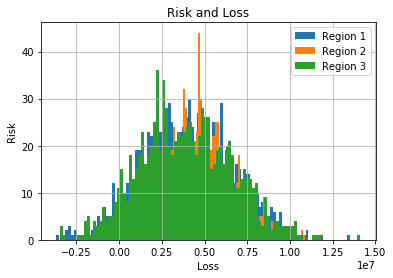

In [16]:
# calculating loss
# region 1
values_1.hist(bins=100)
values_1.quantile(0.069) # 7% risk of loss as profit is negative.

# region 2
values_2.hist(bins=100)
values_2.quantile(0.0066) # 0.66% risk of loss as profit is negative.

# region 3
values_3.hist(bins=100)
values_3.quantile(0.065) # 6.5% risk

plt.title('Risk and Loss')
plt.xlabel('Loss')
plt.ylabel('Risk')
plt.legend(["Region 1", "Region 2", "Region 3"])

### Provide findings: suggest a region for development of oil wells and justify the choice.

Based on this information, region 3 is the region with the highest average profit and should be selected. Evidence supporting this claim is the region 3 avg volume of predicted reserves was the highest at 94.96504596800489, the RMSE 40.02970873393434 also the highest, avg volume in Region 3: 94.88423280885438 (the highest), and the avg volume of 500 randomly selected wells in region 3 was the highest.